<a href="https://colab.research.google.com/github/Sindhuhar/deep_learning/blob/main/keras_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet: Recognizing Handwritten Digits


In [1]:
!pip install tensorflow==2.4.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0, 2.15.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0


### Import Packages

In [3]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

### Implementing LeNet

In [4]:
class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

### LeNet on MNIST

In [5]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))

In [7]:
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

In [8]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainData, trainLabels,
	validation_data=(testData, testLabels), batch_size=128,
	epochs=20, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
469/469 [==============================] - 181s 383ms/step - loss: 0.9844 - accuracy: 0.7237 - val_loss: 0.3361 - val_accuracy: 0.9008
Epoch 2/20
469/469 [==============================] - 148s 315ms/step - loss: 0.2705 - accuracy: 0.9196 - val_loss: 0.2106 - val_accuracy: 0.9375
Epoch 3/20
469/469 [==============================] - 150s 320ms/step - loss: 0.1913 - accuracy: 0.9426 - val_loss: 0.1609 - val_accuracy: 0.9517
Epoch 4/20
469/469 [==============================] - 157s 335ms/step - loss: 0.1495 - accuracy: 0.9554 - val_loss: 0.1166 - val_accuracy: 0.9635
Epoch 5/20
469/469 [==============================] - 149s 317ms/step - loss: 0.1214 - accuracy: 0.9644 - val_loss: 0.0954 - val_accuracy: 0.9715
Epoch 6/20
469/469 [==============================] - 151s 322ms/step - loss: 0.1046 - accuracy: 0.9686 - val_loss: 0.0822 - val_accuracy: 0.9762
Epoch 7/20
469/469 [==============================] - 148s 315ms/step -

[INFO] evaluating network...
79/79 [==============================] - 6s 71ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



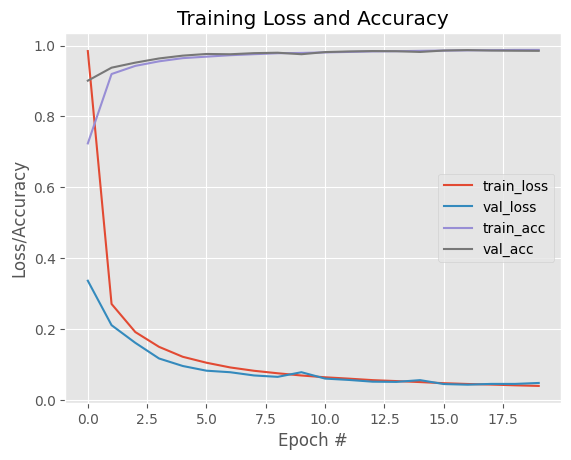

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
print(classification_report(testLabels.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()